In [4]:
# importing libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Define server and database name

server = r'LAPTOP-2K6MH8QU\SQLEXPRESS'
database = 'E_Commerce_Project'

In [7]:
# Create engine using Windows Authentication

engine = create_engine(
    f"mssql+pyodbc://@{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
)

In [8]:
# loading data

orders = pd.read_sql('select * from orders',engine)
order_item_refunds = pd.read_sql('select * from order_item_refunds',engine)
order_items = pd.read_sql('select * from order_items',engine)
products = pd.read_sql('select * from products',engine)
website_pageviews = pd.read_sql('select * from website_pageviews',engine)
w_sessions = pd.read_sql('select * from w_sessions',engine)

### EDA

In [9]:
orders.head(2)

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd,cogs_usd_decimal
0,1,2012-03-19 10:42:46,20,20,1,1,49.990002,19:49:00,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.990002,19:49:00,19.49


In [10]:
order_item_refunds.head(2)

,order_item_refund_id,created_at,order_item_id,order_id,refund_amount_usd
0,1,2012-04-06 11:32:43,57,57,49.990002
1,2,2012-04-13 01:09:43,74,74,49.990002


In [11]:
order_items.head(2)

,order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd,cogs_usd_decimal
0,1,2012-03-19 10:42:46,1,1,1,49.990002,19:49:00,19.49
1,2,2012-03-19 19:27:37,2,1,1,49.990002,19:49:00,19.49


In [12]:
products.head(2)

,product_id,created_at,product_name
0,1,2012-03-19 08:00:00,The Original Mr. Fuzzy
1,2,2013-01-06 13:00:00,The Forever Love Bear


In [13]:
website_pageviews.head(2)

,website_pageview_id,created_at,website_session_id,pageview_url
0,1,2012-03-19 08:04:16,1,/home
1,2,2012-03-19 08:16:49,2,/home


In [14]:
w_sessions.head(2)

,website_session_id,created_at,user_id,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer
0,1,2012-03-19 08:04:16,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
1,2,2012-03-19 08:16:49,2,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com


In [15]:
orders.shape

(32313, 9)

In [16]:
order_items.shape

(40025, 8)

In [17]:
order_item_refunds.shape

(1731, 5)

In [18]:
products.shape

(4, 3)

In [19]:
website_pageviews.shape

(1188124, 4)

In [20]:
w_sessions.shape

(472871, 9)

In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32313 entries, 0 to 32312
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            32313 non-null  int64         
 1   created_at          32313 non-null  datetime64[ns]
 2   website_session_id  32313 non-null  int64         
 3   user_id             32313 non-null  int64         
 4   primary_product_id  32313 non-null  int64         
 5   items_purchased     32313 non-null  int64         
 6   price_usd           32313 non-null  float64       
 7   cogs_usd            24601 non-null  object        
 8   cogs_usd_decimal    24601 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 2.2+ MB


In [22]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40025 entries, 0 to 40024
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_item_id     40025 non-null  int64         
 1   created_at        40025 non-null  datetime64[ns]
 2   order_id          40025 non-null  int64         
 3   product_id        40025 non-null  int64         
 4   is_primary_item   40025 non-null  int64         
 5   price_usd         40025 non-null  float64       
 6   cogs_usd          40025 non-null  object        
 7   cogs_usd_decimal  40025 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 2.4+ MB


In [23]:
order_item_refunds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_item_refund_id  1731 non-null   int64         
 1   created_at            1731 non-null   datetime64[ns]
 2   order_item_id         1731 non-null   int64         
 3   order_id              1731 non-null   int64         
 4   refund_amount_usd     1731 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 67.7 KB


In [24]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   product_id    4 non-null      int64         
 1   created_at    4 non-null      datetime64[ns]
 2   product_name  4 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 228.0+ bytes


In [25]:
website_pageviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188124 entries, 0 to 1188123
Data columns (total 4 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   website_pageview_id  1188124 non-null  int64         
 1   created_at           1188124 non-null  datetime64[ns]
 2   website_session_id   1188124 non-null  int64         
 3   pageview_url         1188124 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 36.3+ MB


In [26]:
w_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472871 entries, 0 to 472870
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   website_session_id  472871 non-null  int64         
 1   created_at          472871 non-null  datetime64[ns]
 2   user_id             472871 non-null  int64         
 3   is_repeat_session   472871 non-null  int64         
 4   utm_source          472871 non-null  object        
 5   utm_campaign        472871 non-null  object        
 6   utm_content         472871 non-null  object        
 7   device_type         472871 non-null  object        
 8   http_referer        472871 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 32.5+ MB


In [27]:
orders['cogs_usd'].unique()

array([datetime.time(19, 49), datetime.time(22, 49), None,
       datetime.time(14, 49), datetime.time(9, 49)], dtype=object)

In [28]:
#Changing data type of cogs_usd from object to float64

def time_to_hhmm(t):
    if pd.isnull(t):
        return np.nan
    return float(f"{t.hour:02d}.{t.minute:02d}")



In [29]:
orders['cogs_usd']=orders['cogs_usd'].apply(time_to_hhmm)

In [30]:
order_items['cogs_usd']=order_items['cogs_usd'].apply(time_to_hhmm)

In [31]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32313 entries, 0 to 32312
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            32313 non-null  int64         
 1   created_at          32313 non-null  datetime64[ns]
 2   website_session_id  32313 non-null  int64         
 3   user_id             32313 non-null  int64         
 4   primary_product_id  32313 non-null  int64         
 5   items_purchased     32313 non-null  int64         
 6   price_usd           32313 non-null  float64       
 7   cogs_usd            24601 non-null  float64       
 8   cogs_usd_decimal    24601 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 2.2 MB


In [32]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40025 entries, 0 to 40024
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_item_id     40025 non-null  int64         
 1   created_at        40025 non-null  datetime64[ns]
 2   order_id          40025 non-null  int64         
 3   product_id        40025 non-null  int64         
 4   is_primary_item   40025 non-null  int64         
 5   price_usd         40025 non-null  float64       
 6   cogs_usd          40025 non-null  float64       
 7   cogs_usd_decimal  40025 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 2.4 MB


### PRODUCT ANALYSIS

In [33]:
# Total No. of Products
Total_Products= products['product_name'].count()
Total_Products

4

In [34]:
# Join Order items and Product Table
order_product=pd.merge(order_items,products,how='left',on='product_id')
order_product.head(2)

,order_item_id,created_at_x,order_id,product_id,is_primary_item,price_usd,cogs_usd,cogs_usd_decimal,created_at_y,product_name
0,1,2012-03-19 10:42:46,1,1,1,49.990002,19.49,19.49,2012-03-19 08:00:00,The Original Mr. Fuzzy
1,2,2012-03-19 19:27:37,2,1,1,49.990002,19.49,19.49,2012-03-19 08:00:00,The Original Mr. Fuzzy


In [35]:
order_product.shape

(40025, 10)

product_name
The Birthday Sugar Panda      0.229260
The Forever Love Bear         0.347702
The Hudson River Mini bear    0.150490
The Original Mr. Fuzzy        1.211058
Name: price_usd, dtype: float64


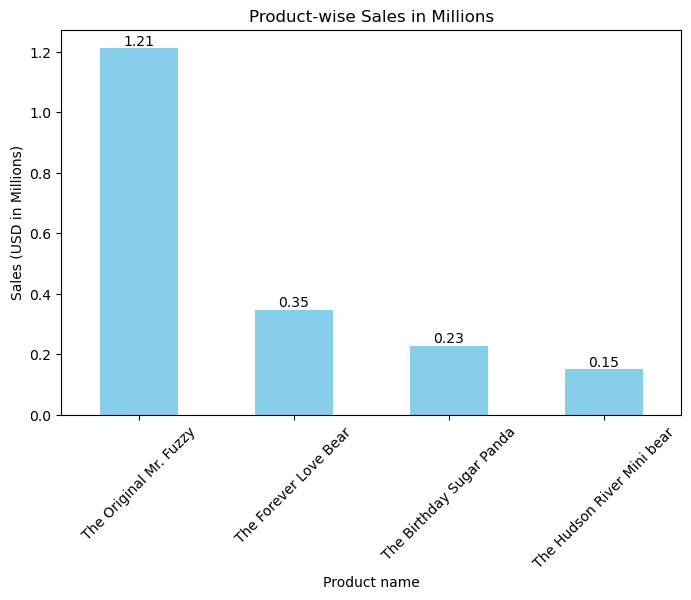

In [36]:
# Sales by Product
Products_Sales=order_product.groupby('product_name')['price_usd'].sum()/1000000
print(Products_Sales)
#Plotting product_wise sales in millions
plt.figure(figsize=(8, 5))
sorted_products_sales = Products_Sales.sort_values(ascending=False)
sorted_products_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Product name')
plt.ylabel('Sales (USD in Millions)')
plt.title('Product-wise Sales in Millions')
plt.xticks(rotation=45)
for i, value in enumerate(sorted_products_sales):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')
plt.show()


product_name
The Birthday Sugar Panda       4985
The Forever Love Bear          5796
The Hudson River Mini bear     5018
The Original Mr. Fuzzy        24226
Name: order_id, dtype: int64


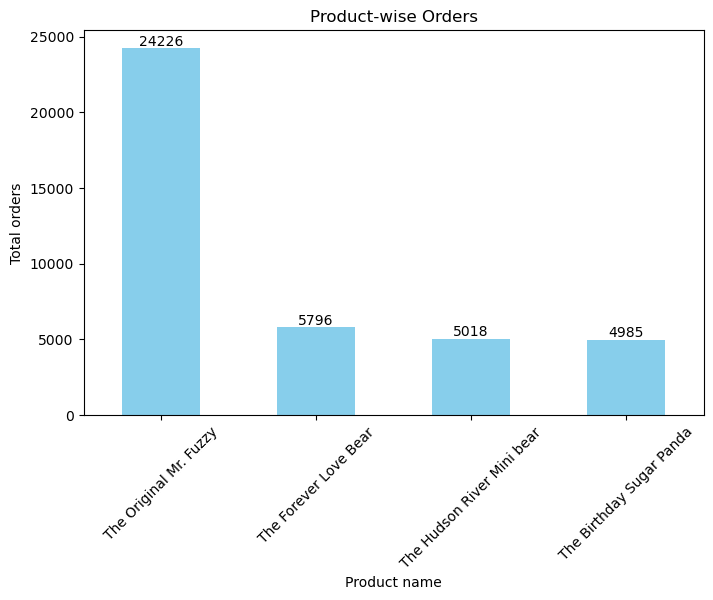

In [37]:
#Product wise Orders
product_orders = order_product.groupby('product_name')['order_id'].nunique()
print(product_orders)

#Plotting product_wise orders
plt.figure(figsize=(8, 5))
sorted_product_orders = product_orders.sort_values(ascending=False)
sorted_product_orders.plot(kind='bar', color='skyblue')
plt.xlabel('Product name')
plt.ylabel('Total orders')
plt.title('Product-wise Orders')
plt.xticks(rotation=45)
for i, value in enumerate(sorted_product_orders):
    plt.text(i, value, f"{value}", ha='center', va='bottom')
plt.show()

In [38]:
Total_orders = order_product['order_id'].nunique()
print(Total_orders)

32313


In [39]:
Total_orders1 = orders['order_id'].nunique()
print(Total_orders1)

32313


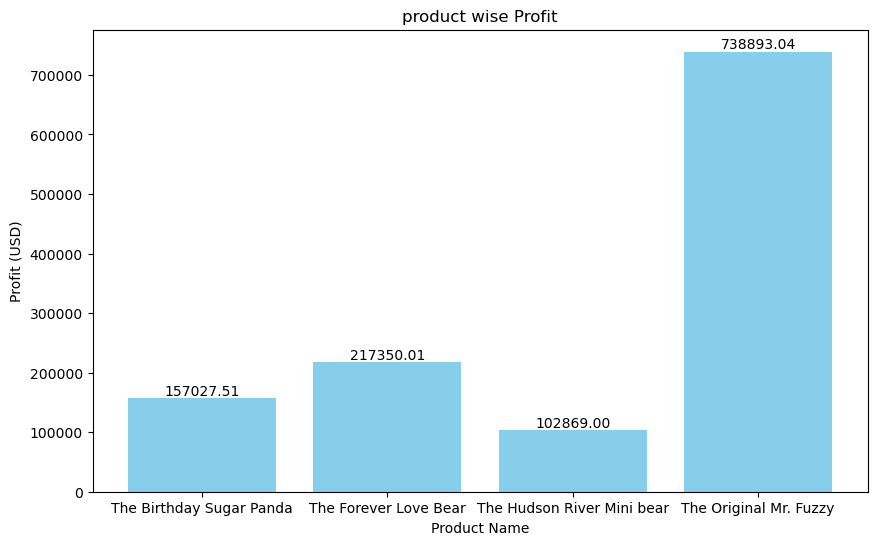

In [40]:
# Product Profitability

#Merge order_items with products
orderitems_product_merged = order_items.merge(products, on='product_id', how='left')


product_sales = orderitems_product_merged.groupby('product_name').agg({'order_item_id': 'count', 'price_usd': 'sum','cogs_usd' : 'sum'}).reset_index()
product_sales.columns = ['product_name', 'Total Quantity', 'Total Revenue','Total Cost']
product_sales

product_sales['Profit'] = product_sales['Total Revenue'] - product_sales['Total Cost']
product_sales

#Plot
plt.figure(figsize=(10, 6))
plt.bar(x=product_sales['product_name'], height=product_sales['Profit'], color='skyblue')
plt.title("product wise Profit")
plt.xlabel("Product Name")
plt.ylabel("Profit (USD)")
for i, value in enumerate(product_sales['Profit']):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')
plt.show()


32313
472871
0.0683336470200118
product_name
The Birthday Sugar Panda      0.010542
The Forever Love Bear         0.012257
The Hudson River Mini bear    0.010612
The Original Mr. Fuzzy        0.051232
Name: order_id, dtype: float64


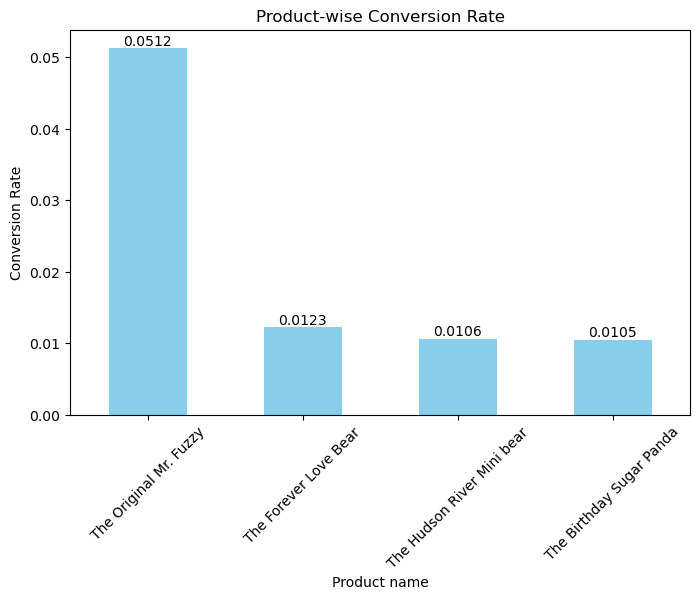

In [41]:
# Product conversion rate

Total_orders = order_product['order_id'].nunique()
print(Total_orders)
Total_sessions = w_sessions['website_session_id'].count()
print(Total_sessions)
conversion_rate= Total_orders / Total_sessions
print(conversion_rate)

# Product wise conversion rate
product_conversion_rate = order_product.groupby('product_name')['order_id'].nunique() / Total_sessions
print(product_conversion_rate)


#Plotting product_wise conversion rate
plt.figure(figsize=(8, 5))
sorted_product_conversion_rate = product_conversion_rate.sort_values(ascending=False)
sorted_product_conversion_rate.plot(kind='bar', color='skyblue')
plt.xlabel('Product name')
plt.ylabel('Conversion Rate')
plt.title('Product-wise Conversion Rate')
plt.xticks(rotation=45)
for i, value in enumerate(sorted_product_conversion_rate):
    plt.text(i, value, f"{value:.4f}", ha='center', va='bottom')
plt.show()

product_name
The Birthday Sugar Panda      0.154272
The Forever Love Bear         0.179371
The Hudson River Mini bear    0.155294
The Original Mr. Fuzzy        0.749729
Name: order_id, dtype: float64


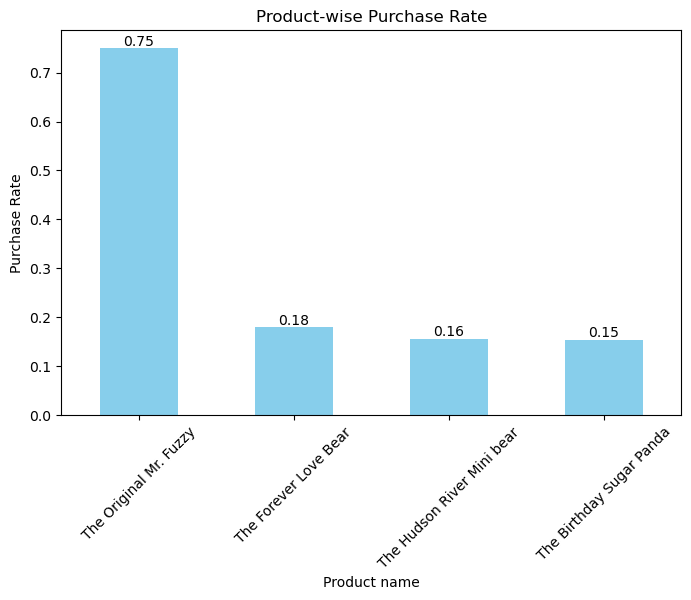

In [42]:
# Product wise Purchase Rate
product_purchase_rate = order_product.groupby('product_name')['order_id'].nunique() / Total_orders
print(product_purchase_rate)


#Plotting product_wise purchase rate
plt.figure(figsize=(8, 5))
sorted_product_purchase_rate = product_purchase_rate.sort_values(ascending=False)
sorted_product_purchase_rate.plot(kind='bar', color='skyblue')
plt.xlabel('Product name')
plt.ylabel('Purchase Rate')
plt.title('Product-wise Purchase Rate')
plt.xticks(rotation=45)
for i, value in enumerate(sorted_product_purchase_rate):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')
plt.show()

In [43]:
# Merge Order_item_refund and product table

orderitemrefund_product=pd.merge(order_item_refunds,order_product,on='order_item_id',how='left')
orderitemrefund_product.head(2)




,order_item_refund_id,created_at,order_item_id,order_id_x,refund_amount_usd,created_at_x,order_id_y,product_id,is_primary_item,price_usd,cogs_usd,cogs_usd_decimal,created_at_y,product_name
0,1,2012-04-06 11:32:43,57,57,49.990002,2012-03-31 02:32:43,57,1,1,49.990002,19.49,19.49,2012-03-19 08:00:00,The Original Mr. Fuzzy
1,2,2012-04-13 01:09:43,74,74,49.990002,2012-04-03 19:09:43,74,1,1,49.990002,19.49,19.49,2012-03-19 08:00:00,The Original Mr. Fuzzy


In [44]:
order_items.head(2)

,order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd,cogs_usd_decimal
0,1,2012-03-19 10:42:46,1,1,1,49.990002,19.49,19.49
1,2,2012-03-19 19:27:37,2,1,1,49.990002,19.49,19.49


32313
product_name
The Birthday Sugar Panda      0.009315
The Forever Love Bear         0.003992
The Hudson River Mini bear    0.001981
The Original Mr. Fuzzy        0.038282
Name: order_item_refund_id, dtype: float64


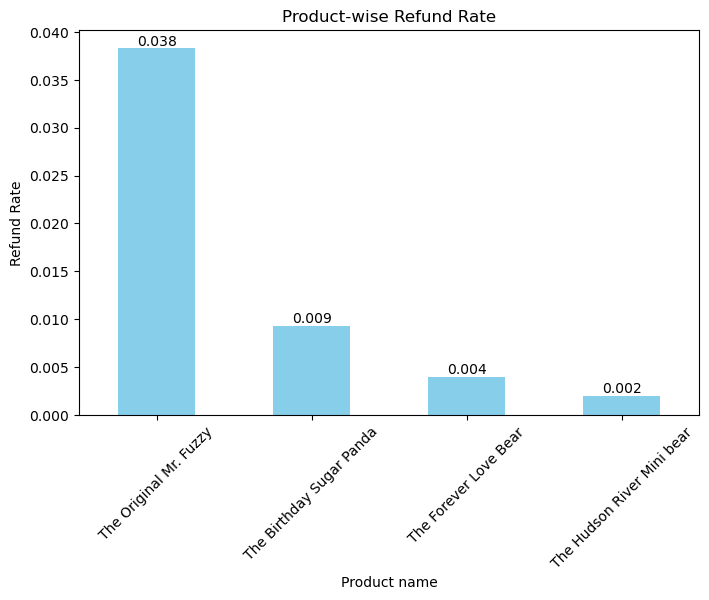

In [45]:
#Product wise refund rate
Total_orders = order_items['order_id'].nunique()
print(Total_orders)
refund_rate= orderitemrefund_product.groupby('product_name')['order_item_refund_id'].count() / Total_orders
print(refund_rate)


#Plotting product_wise refund rate
plt.figure(figsize=(8, 5))
sorted_refund_rate = refund_rate.sort_values(ascending=False)
sorted_refund_rate.plot(kind='bar', color='skyblue')
plt.xlabel('Product name')
plt.ylabel('Refund Rate')
plt.title('Product-wise Refund Rate')
plt.xticks(rotation=45)
for i, value in enumerate(sorted_refund_rate):
    plt.text(i, value, f"{value:.3f}", ha='center', va='bottom')
plt.show()

In [46]:
order_product.head(2)

,order_item_id,created_at_x,order_id,product_id,is_primary_item,price_usd,cogs_usd,cogs_usd_decimal,created_at_y,product_name
0,1,2012-03-19 10:42:46,1,1,1,49.990002,19.49,19.49,2012-03-19 08:00:00,The Original Mr. Fuzzy
1,2,2012-03-19 19:27:37,2,1,1,49.990002,19.49,19.49,2012-03-19 08:00:00,The Original Mr. Fuzzy


    created_at_x                product_name  price_usd
0           2012      The Original Mr. Fuzzy   0.129274
1           2013    The Birthday Sugar Panda   0.006393
2           2013       The Forever Love Bear   0.079367
3           2013      The Original Mr. Fuzzy   0.307489
4           2014    The Birthday Sugar Panda   0.171451
5           2014       The Forever Love Bear   0.192688
6           2014  The Hudson River Mini bear   0.105595
7           2014      The Original Mr. Fuzzy   0.605879
8           2015    The Birthday Sugar Panda   0.051417
9           2015       The Forever Love Bear   0.075647
10          2015  The Hudson River Mini bear   0.044895
11          2015      The Original Mr. Fuzzy   0.168416


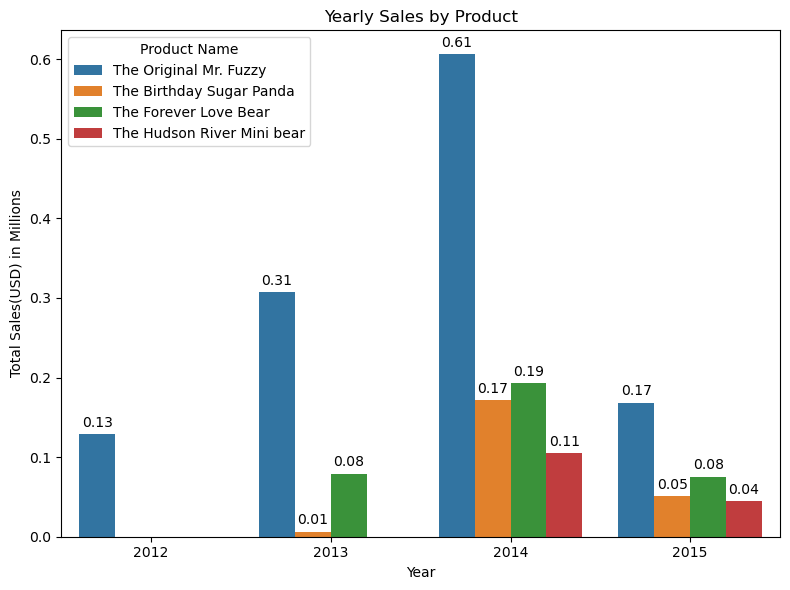

In [47]:
# Product sales and product lauches


# Yearly Revenue per Product
Yearly_product_sales = order_product.groupby([order_product['created_at_x'].dt.year,'product_name'])['price_usd'].sum().div(1000000).reset_index()
print(Yearly_product_sales)


# Plot
plt.figure(figsize=(8,6))
ax=sns.barplot(data=Yearly_product_sales, x='created_at_x', y='price_usd', hue='product_name')
plt.legend(title='Product Name', loc='upper left')
plt.title('Yearly Sales by Product')
plt.xlabel('Year')
plt.ylabel('Total Sales(USD) in Millions')
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)
plt.show()

                product_name_x              product_name_y  count
0     The Birthday Sugar Panda       The Forever Love Bear    248
1     The Birthday Sugar Panda  The Hudson River Mini bear    662
2     The Birthday Sugar Panda      The Original Mr. Fuzzy   2036
3        The Forever Love Bear    The Birthday Sugar Panda    248
4        The Forever Love Bear  The Hudson River Mini bear    680
5        The Forever Love Bear      The Original Mr. Fuzzy    944
6   The Hudson River Mini bear    The Birthday Sugar Panda    662
7   The Hudson River Mini bear       The Forever Love Bear    680
8   The Hudson River Mini bear      The Original Mr. Fuzzy   3142
9       The Original Mr. Fuzzy    The Birthday Sugar Panda   2036
10      The Original Mr. Fuzzy       The Forever Love Bear    944
11      The Original Mr. Fuzzy  The Hudson River Mini bear   3142


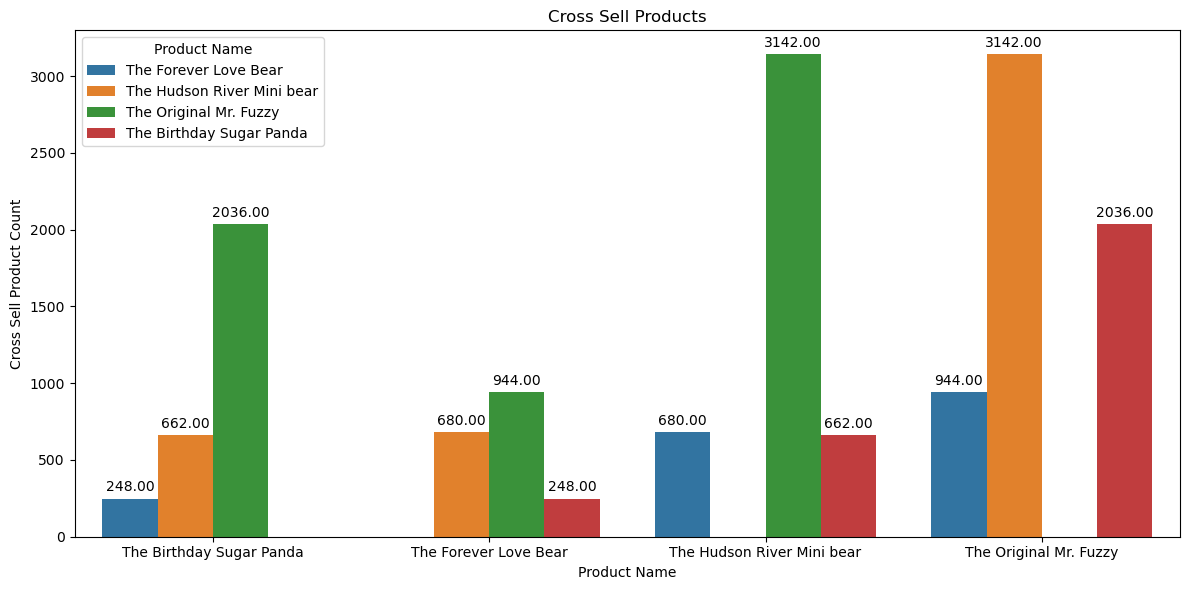

In [48]:
# Cross sell Products

# Create pairs
merge1 = order_items.merge(products,on='product_id')
merge1

# Create pairs
items_merge = merge1.merge(merge1,on='order_id')
items_merge

pairs =items_merge.merge(products, left_on=['product_id_x'], right_on=['product_id'], suffixes=('_x', '_y'))
pairs

# Remove self-pairs and duplicates
pairs = pairs[pairs['product_id_x'] != pairs['product_id_y']]
pairs

# Count pairs
pair_counts = pairs.groupby(['product_name_x','product_name_y']).size().reset_index(name='count')
print(pair_counts)


# Plot
plt.figure(figsize=(12,6))
ax=sns.barplot(data=pair_counts, x='product_name_x', y='count', hue='product_name_y')
plt.legend(title='Product Name', loc='upper left')
plt.title('Cross Sell Products')
plt.xlabel('Product Name')
plt.ylabel('Cross Sell Product Count')
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)
plt.show()




### USER ANALYSIS

In [49]:
# Total Users
Total_Users = orders['user_id'].nunique()
Total_Users

31696

In [50]:
# Average Order Value
total_revenue = orders['price_usd'].sum()
total_orders = orders['order_id'].nunique()
average_order_value = total_revenue / total_orders
average_order_value

59.99163854059076

In [51]:
# Refund Rate
total_refunds = order_item_refunds['refund_amount_usd'].sum()
refund_rate = total_refunds / total_revenue
refund_rate

0.044022832420993634

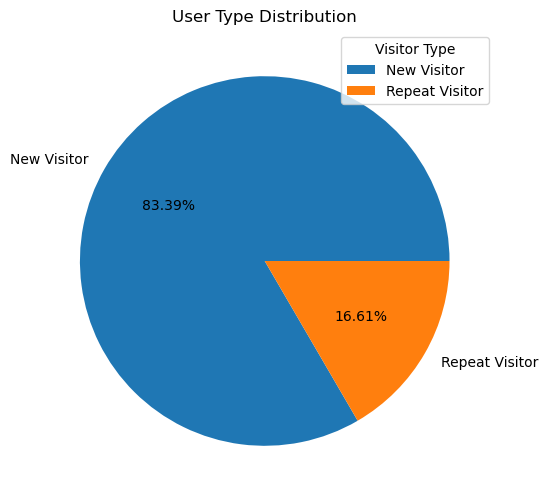

In [52]:
#  New vs Repeat Visitors
visitor_types = w_sessions.groupby('is_repeat_session')['website_session_id'].count().reset_index()
visitor_types.columns = ['is_repeat_session', 'session_count']
visitor_types

mapping={0: 'New Visitor', 1: 'Repeat Visitor'}
visitor_types['is_repeat_session'] = visitor_types['is_repeat_session'].map(mapping)
visitor_types

# Plotting New vs Repeat Visitors
plt.figure(figsize=(10,6))
plt.pie(visitor_types['session_count'], labels=visitor_types['is_repeat_session'],autopct='%1.2f%%')
plt.legend(title='Visitor Type', loc='best')
plt.title('User Type Distribution')
plt.show()

In [53]:
# Customer Summary
# Merge orders with order_items
orders_with_items = pd.merge(order_items, orders, on='order_id', how='inner')
orders_with_items

# Customer wise data
customer_summary = orders_with_items.groupby('user_id').agg(Total_spent=('price_usd_x', 'sum'),Total_orders=('order_id', 'nunique')).reset_index()
customer_summary



,user_id,Total_spent,Total_orders
0,13,49.990002,1
1,20,49.990002,1
2,59,49.990002,1
3,104,49.990002,1
4,147,49.990002,1
...,...,...,...
31691,394231,49.990002,1
31692,394255,49.990002,1
31693,394257,29.990000,1
31694,394268,89.980001,1


59.9900016784668
49.9900016784668


  Segment_Monetary  Number_of_Customers
0       High Value                11743
1        Low Value                 2463
2     Medium Value                17490


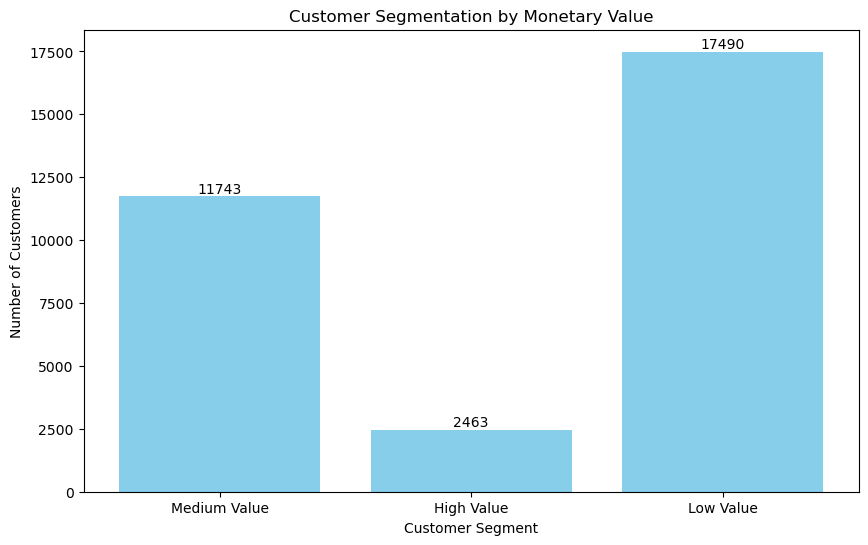

In [55]:
# Customer Segmentation by Monetary Value

print(np.percentile(customer_summary['Total_spent'],66))
print(np.percentile(customer_summary['Total_spent'],33))

# Customer Segmentation
def Monetary_segment(x):
    if x >= np.percentile(customer_summary['Total_spent'],66):
        return 'High Value'
    elif x>= np.percentile(customer_summary['Total_spent'],33):
        return 'Medium Value'
    else:
        return 'Low Value'
    
customer_summary['Segment_Monetary'] = customer_summary['Total_spent'].apply(Monetary_segment)
customer_summary

# Summarize the Monetary segments
Monetary_segment_summary = customer_summary.groupby('Segment_Monetary')['user_id'].count().reset_index()
Monetary_segment_summary.columns = ['Segment_Monetary', 'Number_of_Customers']
print(Monetary_segment_summary)

# Plot
plt.figure(figsize=(10, 6))
Monetary_segment_summary_sorted = Monetary_segment_summary.sort_values(by='Number_of_Customers',ascending=False)
plt.bar(x=Monetary_segment_summary_sorted['Segment_Monetary'], height=Monetary_segment_summary['Number_of_Customers'], color='skyblue')
plt.title("Customer Segmentation by Monetary Value")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
for i,value in enumerate(Monetary_segment_summary['Number_of_Customers']):
    plt.text(i, value, f"{value}", ha='center', va='bottom')
plt.show()

  Segment_Frequency  Number_of_Customers
0        High Value                   26
1         Low Value                31105
2      Medium Value                  565


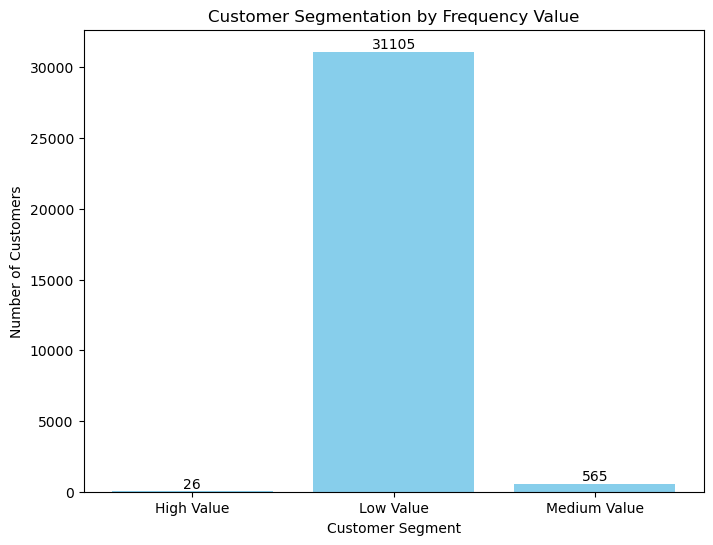

In [67]:
# Customer Segmentation by Frequency Value

# Customer Segmentation
def Frequency_segment(x):
    if x >= 3:
        return 'High Value'
    elif x>= 2:
        return 'Medium Value'
    else:
        return 'Low Value'
    
customer_summary['Segment_Frequency'] = customer_summary['Total_orders'].apply(Frequency_segment)
customer_summary

# Summarize the Monetary segments
Frequency_segment_summary = customer_summary.groupby('Segment_Frequency')['user_id'].count().reset_index()
Frequency_segment_summary.columns = ['Segment_Frequency', 'Number_of_Customers']
print(Frequency_segment_summary)


# Plot
plt.figure(figsize=(8,6))
plt.bar(x=Frequency_segment_summary['Segment_Frequency'], height=Frequency_segment_summary['Number_of_Customers'], color='skyblue')
plt.title("Customer Segmentation by Frequency Value")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
for i,value in enumerate(Frequency_segment_summary['Number_of_Customers']):
    plt.text(i, value, f"{value}", ha='center', va='bottom')
plt.show()


  Segment_Recency  Number_of_Customers
1       Low Value                10790
0      High Value                10455
2    Medium Value                10451


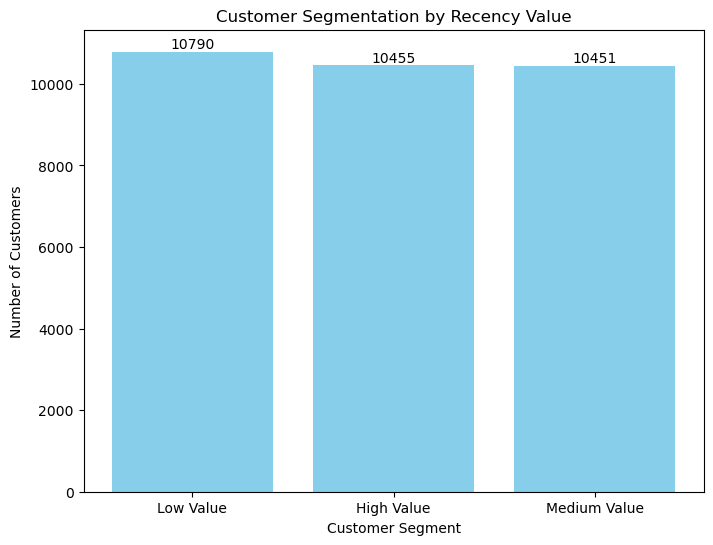

In [65]:
customer_summary['Last_purchase']= orders_with_items.groupby('user_id')['created_at_x'].transform('max')
#Recency Calculation
customer_summary['Recency'] = (pd.to_datetime('now') - customer_summary['Last_purchase']).dt.days
            
# Customer Segmentation
def Recency_segment(x):
    if x >= np.percentile(customer_summary['Recency'],66):
        return 'Low Value'
    elif x>= np.percentile(customer_summary['Recency'],33):
        return 'Medium Value'
    else:
        return 'High Value'
    
customer_summary['Segment_Recency'] = customer_summary['Recency'].apply(Recency_segment)
            
# Summarize the Recency segments
Recency_segment_summary = customer_summary.groupby('Segment_Recency')['user_id'].count().reset_index()
Recency_segment_summary.columns = ['Segment_Recency', 'Number_of_Customers']
Recency_segment_summary

# Step 5: Sort by customer count
Recency_segment_summary = Recency_segment_summary.sort_values(by='Number_of_Customers', ascending=False)
print(Recency_segment_summary)



# Plot
plt.figure(figsize=(8,6))
plt.bar(x=Recency_segment_summary['Segment_Recency'], height=Recency_segment_summary['Number_of_Customers'], color='skyblue')
plt.title("Customer Segmentation by Recency Value")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
for i,value in enumerate(Recency_segment_summary['Number_of_Customers']):
    plt.text(i, value, f"{value}", ha='center', va='bottom')
plt.show()

In [71]:
customer_summary.head(2)

,user_id,Total_spent,Total_orders,Segment_Monetary,Last_purchase,Recency,Segment_Recency,Segment_Frequency
0,13,49.990002,1,Medium Value,2012-03-19 10:42:46,4869,Low Value,Low Value
1,20,49.990002,1,Medium Value,2012-03-19 19:27:37,4868,Low Value,Low Value


In [73]:
RFM_Final.head(2)

,user_id,Total_spent,Total_orders,Segment_Monetary,Last_purchase,Recency,Segment_Recency_x,Segment_Frequency,Segment_Recency_y
0,13,49.990002,1,2,2012-03-19 10:42:46,4869,Low Value,1,Low Value
1,20,49.990002,1,2,2012-03-19 19:27:37,4868,Low Value,1,Low Value


In [74]:
RFM_Summary.head(2)

,user_id,Total_spent,Total_orders,Segment_Monetary,Last_purchase,Recency,Segment_Recency_x,Segment_Frequency,Segment_Recency_y
0,13,49.990002,1,Medium Value,2012-03-19 10:42:46,4869,Low Value,Low Value,Low Value
1,20,49.990002,1,Medium Value,2012-03-19 19:27:37,4868,Low Value,Low Value,Low Value


In [78]:
# RFM Segmentation
mapping={"Low Value": 1, "Medium Value": 2, "High Value": 3}
RFM_Final=customer_summary.copy()
RFM_Final=RFM_Final.replace({"Segment_Monetary": mapping, "Segment_Frequency": mapping, "Segment_Recency": mapping})
RFM_Final['RFM_Score']= RFM_Final['Segment_Monetary'] + RFM_Final['Segment_Frequency'] + RFM_Final['Segment_Recency']  
RFM_Final


def RFM_segment(x):
    if x>np.percentile(RFM_Final['RFM_Score'],66):
        return 'High Value'
    elif x>np.percentile(RFM_Final['RFM_Score'],33):
        return 'Medium Value'
    else:
        return 'Low Value'
    

RFM_Final['Segment_RFM'] = RFM_Final['RFM_Score'].apply(RFM_segment)
RFM_Final

# Summarize the RFM segments
RFM_Final_summary = RFM_Final.groupby('Segment_RFM')['user_id'].count().reset_index()
RFM_Final_summary.columns = ['RFM Segment', 'Number_of_Customers']
print(RFM_Final_summary)




    RFM Segment  Number_of_Customers
0    High Value                 5238
1     Low Value                17471
2  Medium Value                 8987


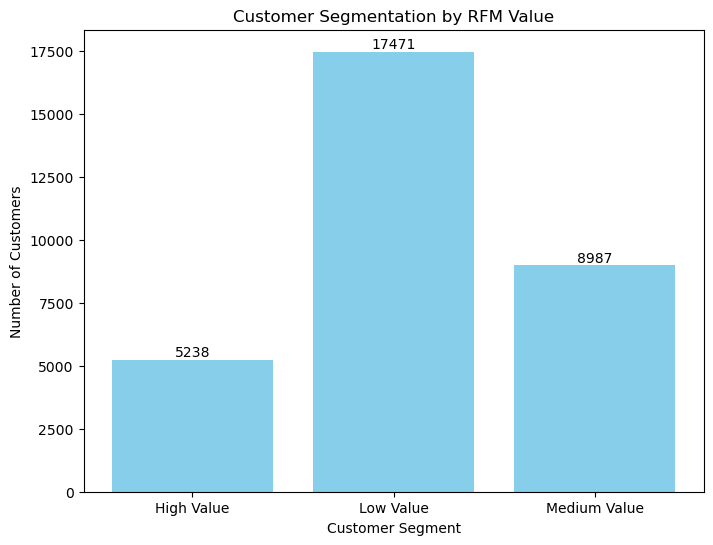

In [79]:

# Plot
plt.figure(figsize=(8,6))
plt.bar(x=RFM_Final_summary['RFM Segment'], height=RFM_Final_summary['Number_of_Customers'], color='skyblue')
plt.title("Customer Segmentation by RFM Value")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
for i,value in enumerate(RFM_Final_summary['Number_of_Customers']):
    plt.text(i, value, f"{value}", ha='center', va='bottom')
plt.show()

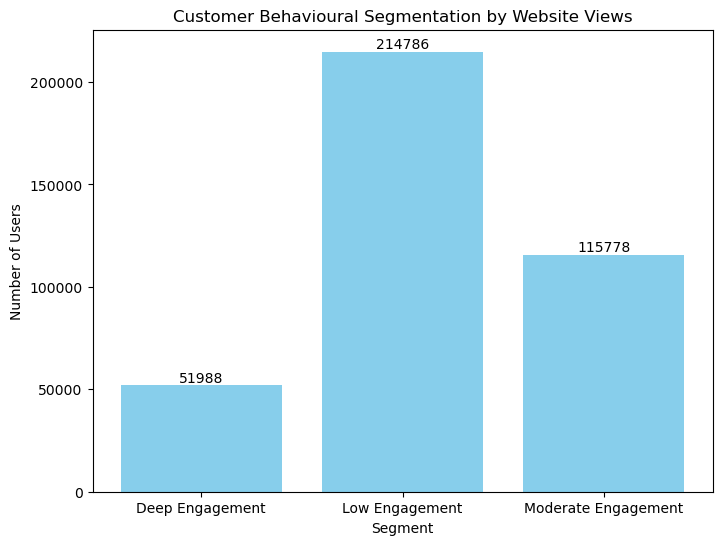

In [ ]:
# Behavioural Segmentation

page_counts = website_pageviews.groupby('website_session_id')['pageview_url'].nunique().reset_index(name='pages_viewed')
page_counts

session_page_merged=w_sessions.merge(page_counts, on='website_session_id', how='left')
session_page_merged.head(2)

pageview_summary= session_page_merged.groupby('pages_viewed')['user_id'].nunique().reset_index(name='Number_of_Users')
pageview_summary


def segment_behavior(x):
    if x >= np.percentile(pageview_summary['pages_viewed'],66):
        return 'Deep Engagement'
    elif x >= np.percentile(pageview_summary['pages_viewed'],33):
        return 'Moderate Engagement'
    else:
        return 'Low Engagement'
    
pageview_summary['Segment'] = pageview_summary['pages_viewed'].apply(segment_behavior)
pageview_summary


Behaviour_summary=pageview_summary.groupby('Segment')['Number_of_Users'].sum().reset_index()
Behaviour_summary

#Plot
plt.figure(figsize=(8,6))
plt.bar(x=Behaviour_summary['Segment'], height=Behaviour_summary['Number_of_Users'], color='skyblue')
plt.title("Customer Behavioural Segmentation by Website Views")
plt.xlabel("Segment")
plt.ylabel("Number of Users")
for i,value in enumerate(Behaviour_summary['Number_of_Users']):
    plt.text(i, value, f"{value}", ha='center', va='bottom')
plt.show()

In [ ]:
# Cohort Analysis


orders['cohort_month'] = orders.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
orders['order_month'] = orders['created_at'].dt.to_period('M')

cohort_data = orders.groupby(['cohort_month','order_month']).agg({'user_id':'nunique'}).reset_index()
cohort_pivot = cohort_data.pivot(index='cohort_month', columns='order_month', values='user_id')

cohort_pivot.head(37)


order_month,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,...,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03
cohort_month,,,,,,,,,,,,,,,,,,,,,
2012-03,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05,NaN,NaN,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06,NaN,NaN,NaN,139.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07,NaN,NaN,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08,NaN,NaN,NaN,NaN,NaN,227.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09,NaN,NaN,NaN,NaN,NaN,NaN,286.0,1.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,612.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
